In [7]:
import os
import numpy as np
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt

c:\Users\karishma\OneDrive\Projects\qCLEF\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
class UMAPReducer:
    def __init__(self, n_components=2, n_neighbors=15, min_dist=0.1, metric='euclidean'):
        self.n_components = n_components
        self.n_neighbors = n_neighbors
        self.min_dist = min_dist
        self.metric = metric
        self.reducer = umap.UMAP(
            n_components=self.n_components, 
            n_neighbors=self.n_neighbors, 
            min_dist=self.min_dist, 
            metric=self.metric
        )
    
    def fit_transform(self, embeddings):
        """Reduces the dimensionality of the input embeddings."""
        return self.reducer.fit_transform(embeddings)
    
    def plot_embeddings(self, reduced_embeddings, labels=None):
        """Visualizes the reduced embeddings in a scatter plot."""
        plt.figure(figsize=(8, 6))
        if labels is not None:
            plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap='Spectral', s=5)
            plt.colorbar()
        else:
            plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], s=5)
        plt.title('UMAP Reduced Embeddings')
        plt.show()

In [4]:
np.random.seed(42)

script_dir = os.getcwd()
data_dir = os.path.abspath(os.path.join(script_dir, "..", "..", "data"))
output_csv = os.path.join(data_dir, "antique_train_with_embeddings.csv")

In [13]:
def parse_embedding(text):
    return np.array(eval(text), dtype=np.float64)

train_df = pd.read_csv(output_csv, converters={"doc_embedding": parse_embedding})
doc_embeddings = np.stack(train_df["doc_embedding"].values)

In [14]:
doc_embeddings[0][0]

np.float64(0.0625365749001503)

In [8]:
reducer = UMAPReducer(n_components=2)
reduced_data = reducer.fit_transform(doc_embeddings)

c:\Users\karishma\OneDrive\Projects\qCLEF\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [9]:
reduced_output_path = os.path.join(data_dir, "doc_embeddings_reduced.npy")
np.save(reduced_output_path, reduced_data)
print(f"Reduced document embeddings saved at: {reduced_output_path}")

Reduced document embeddings saved at: c:\Users\karishma\OneDrive\Projects\qCLEF\data\doc_embeddings_reduced.npy


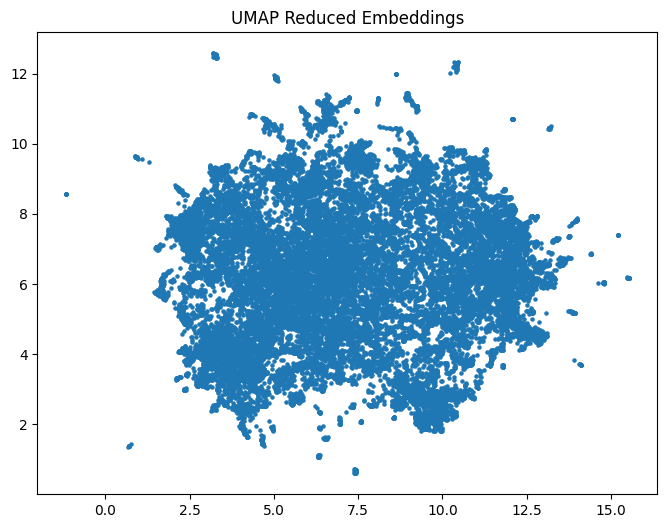

In [10]:
reducer.plot_embeddings(reduced_data)